### EAPP Postprocessing

 **Disclaimer**: notebook in progress, only to illustrate new graphs with regional model !

### _Options_

In [28]:
from utils import *

In [29]:
## Options

# Folder
RESULTS_FOLDER = 'simulations_run_20250317_190351' # Name of the folder containing the results
DISPLAY = True # Usually set to False to avoid displaying the graphs

# Scenarios
SCENARIOS_RENAME = {
    'baseline': 'BAU',
    'expansion': 'EXP',
}
selected_scenario = 'baseline'
scenario_order = ['baseline', 'expansion']

# Map file
EPM_TO_GEOJSON = {
    'South Africa': 'South_Africa',
    'Namibia': 'Namibia',
    'Mozambique': 'Mozambique',
    'United Republic of Tanzania': 'Tanzania',
    'Angola': 'Angola',
    'Botswana': 'Botswana',
    'Zambia': 'Zambia',
    'Malawi': 'Malawi',
    'Lesotho': 'Lesotho',
    'Zimbabwe': 'Zimbabwe',
    'Democratic Republic of the Congo': 'DRC',
}


# Option values 
DISCOUNT_RATE = 0.06
SELECT_XAXIS = [2026] # x-axis displayed range for the graphs

# Plot specifications
dict_specs = read_plot_specs()



In [30]:
# Create the folder path
RESULTS_FOLDER = os.path.join('..', 'output', RESULTS_FOLDER)
GRAPHS_RESULTS = 'img'
GRAPHS_RESULTS = os.path.join(RESULTS_FOLDER, GRAPHS_RESULTS)
if not os.path.exists(GRAPHS_RESULTS):
    os.makedirs(GRAPHS_RESULTS)
    print(f'Created folder {GRAPHS_RESULTS}')
print(f"Result folder: {RESULTS_FOLDER}")

Result folder: ..\output\simulations_run_20250317_190351


### _Read data_

In [31]:
# Extract and process EPM inputs
epm_input = extract_epm_folder(RESULTS_FOLDER, file='input.gdx')
epm_input = process_epm_inputs(epm_input, dict_specs, scenarios_rename=SCENARIOS_RENAME)
mapping_gen_fuel = epm_input['pGenDataExcel'].loc[:, ['scenario', 'generator', 'fuel']]

# Extract and process EPM results
epm_results = extract_epm_folder(RESULTS_FOLDER, file='epmresults.gdx')
epm_results = process_epm_results(epm_results, dict_specs, scenarios_rename=SCENARIOS_RENAME,
                                  mapping_gen_fuel=mapping_gen_fuel)

# Add plant colors to the dictionary
if True:
    temp = epm_results['pEnergyByPlant'].copy()
    plant_fuel_pairs = temp[['generator', 'fuel']].drop_duplicates()
    plant_fuel_pairs['colors'] = plant_fuel_pairs['fuel'].map(dict_specs['colors'])
    plant_to_color = dict(zip(plant_fuel_pairs['generator'], plant_fuel_pairs['colors']))
    dict_specs['colors'].update(plant_to_color)

InterchangeExt not in epm_results.keys().
InterconUtilization not in epm_results.keys().
pCurtailedVRET not in epm_results.keys().
pNPVByYear not in epm_results.keys().
pInterconUtilizationExt not in epm_results.keys().
pPlantFuelDispatch not in epm_results.keys().
interchanges not in epm_results.keys().
InterconUtilizationExt not in epm_results.keys().
Interchange not in epm_results.keys().
pCurtailedStoHY not in epm_results.keys().
AdditiononalCapacity_trans not in epm_results.keys().
pFuelDispatch not in epm_results.keys().
pHourlyFlow not in epm_results.keys().
pInterchangeExt not in epm_results.keys().
annual_line_capa not in epm_results.keys().
pFuelDispatch not found in epm_dict
pPlantFuelDispatch not found in epm_dict


### _Plotting figures_

Mix

In [32]:
## Generation mix

scenario = 'EXP'
zone='Ethiopia'

df = epm_results['pEnergyFuel'].copy()

for zone in list(df['zone'].unique()):
    df_zone = df.loc[(df['zone'] == zone)&(df['scenario'] == 'EXP')]
    filename = RESULTS_FOLDER+'/img/'+f'generation_mix_{scenario}_{zone}'
    stacked_area_plot(df_zone, column_xaxis="year", column_value="value", column_stacked="fuel", 
                      dict_colors=dict_specs['colors'], title=f'Generation mix - {scenario} - {zone}',
                      filename=filename)
    print(f'{zone} mix graph saved in {filename}')
    

Burundi mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Burundi
Djibouti mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Djibouti
Drc_E mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Drc_E
Egypt mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Egypt
Ethiopia mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Ethiopia
Kenya mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Kenya
Libya mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Libya
Mogadishu mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Mogadishu
Rwanda mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_Rwanda
SomaliaROC mix graph saved in ..\output\simulations_run_20250317_190351/img/generation_mix_EXP_SomaliaROC
Soma

In [33]:
## Get map data  

zone_map, geojson_to_epm = get_json_data(epm_results, dict_specs, geo_add='static/eapp_zones_add.geojson')
geojson_to_epm = {row["ADMIN"]: row["ADMIN"] for _, row in zone_map.iterrows()}
geojson_to_epm['South Sudan'] = 'SouthSudan'
zone_map, centers = create_zonemap(zone_map, map_geojson_to_epm=geojson_to_epm)

c:\Users\wb590892\Documents\EPM_Models\Rwanda\EPM_local\epm\postprocessing\utils.py:2613: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  region_sizes['area'] = region_sizes.geometry.area


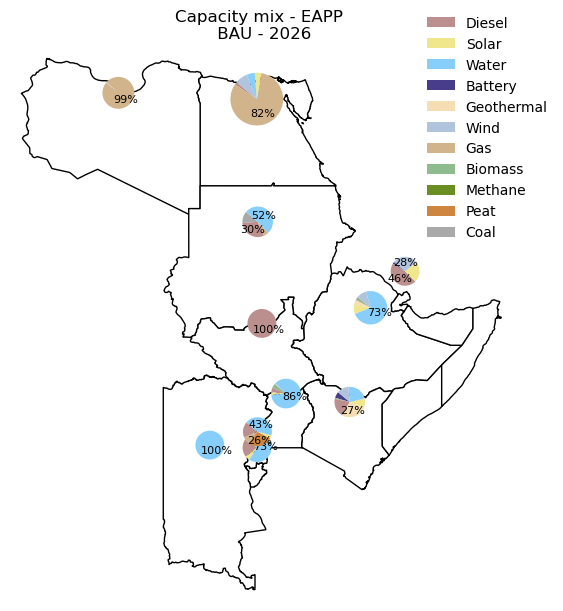

In [34]:
# Capacity map

df = epm_results['pCapacityFuel'].copy()
df = df.loc[df.zone.isin(list(geojson_to_epm.values()))]
make_capacity_mix_map(zone_map, df, dict_specs['colors'], centers, year=2026, region='EAPP', scenario='BAU', filename=None,
                      map_epm_to_geojson=geojson_to_epm, figsize=(8,6), bbox_to_anchor=(0.7, 0.6), loc='center left', 
                      pie_sizing=True,  min_size=1.5, max_size=4)

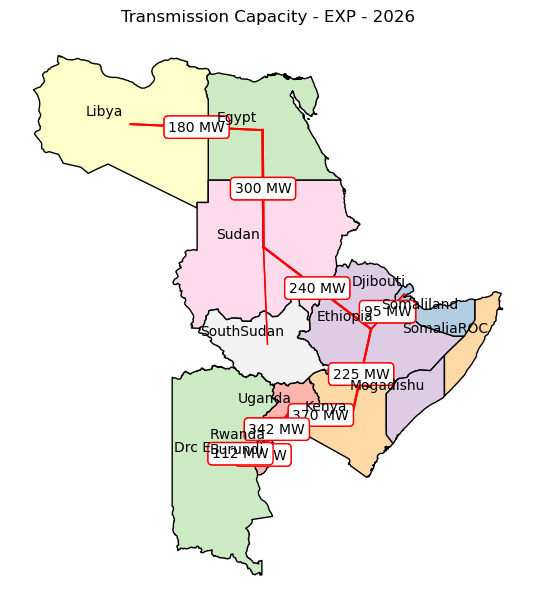

In [35]:
# Transmission lines

df = epm_results['pAnnualTransmissionCapacity'].copy()
make_interconnection_map(zone_map, df, centers, year=2026, scenario='EXP', label_yoffset=0.01, label_xoffset=-0.05,
                         label_fontsize=10, show_labels=True, min_display_capacity=20, figsize=(8, 6))

In [36]:
## Interactive map

# Preprocess transmission data
capa_transmission = epm_results['pAnnualTransmissionCapacity'].copy()
utilization_transmission = epm_results['pInterconUtilization'].copy()
transmission_data = capa_transmission.rename(columns={'value': 'capacity'}).merge(utilization_transmission.rename(columns={'value': 'utilization'}), 
                                                                                 on=['scenario', 'zone', 'z2', 'year'])
transmission_data = transmission_data.rename(columns={'zone': 'zone_from', 'z2': 'zone_to'})


energy_data = epm_results['pEnergyBalance'].copy()
pCapacityFuel = epm_results['pCapacityFuel'].copy()
pEnergyFuel = epm_results['pEnergyFuel'].copy()
pDispatch = epm_results['pDispatch'].copy()
pDispatchPlant = epm_results['pDispatchPlant'].copy()
year = 2030
scenario = 'EXP'
filename = f'{RESULTS_FOLDER}/interactivemap.html'


create_interactive_map(zone_map, centers, transmission_data, energy_data, year, scenario, filename,
                           dict_specs, pCapacityFuel, pEnergyFuel, pDispatch, pDispatchPlant)

c:\Users\wb590892\Documents\EPM_Models\Rwanda\EPM_local\epm\postprocessing\utils.py:3124: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pFuelDispatch_pivot = pFuelDispatch_zone.pivot_table(index=['season', 'day', 't'],
c:\Users\wb590892\Documents\EPM_Models\Rwanda\EPM_local\epm\postprocessing\utils.py:3133: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pDemand_pivot = pDemand_zone.pivot_table(index=['season', 'day', 't'], values='value')
c:\Users\wb590892\Documents\EPM_Models\Rwanda\EPM_local\epm\postprocessing\utils.py:3124: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify obs

Interactive map saved to ..\output\simulations_run_20250317_190351/interactivemap.html
